In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
def graficarCampana(target_distribution):
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    plt.plot(target_distribution, label='Valor planeado')
    plt.title('Actividad de 44 días')
    plt.xlabel('Días laborables')
    plt.ylabel('Recursos')
    plt.legend()
    plt.show()

In [3]:
def gaussian_distribution(days_distribution, mean, std_dev):
    # Crear un rango de valores en el eje x
    x_values = np.linspace(1, days_distribution, days_distribution)
    y_values = norm.pdf(x_values, mean, std_dev)
    
    # Ajustar la campana de Gauss para que la suma de las probabilidades sea 1
    sum_y_values = np.sum(y_values)
    ajuste = (1 - sum_y_values) / days_distribution

    for i in range(len(y_values)):
        y_values[i] += ajuste

    return y_values, x_values

Suma de probabilidades: 0.9999999999999999
Días laborables: 39
Media: 16
Desviación estándar: 5.4
Distribución: [0.16 0.26 0.41 0.63 0.93 1.34 1.85 2.47 3.19 3.99 4.82 5.62 6.34 6.9
 7.27 7.39 7.27 6.9  6.34 5.62 4.82 3.99 3.19 2.47 1.85 1.34 0.93 0.63
 0.41 0.26 0.16 0.1  0.06 0.03 0.02 0.01 0.01 0.01 0.01]
Suma de probabilidades: 100.00000000000001


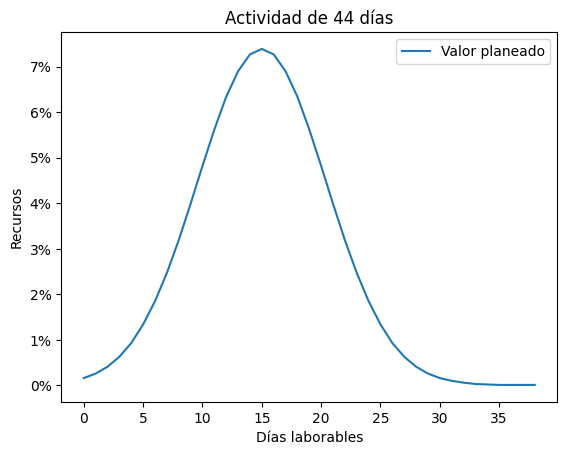

Progreso real: [0.14504367072114782 0.23546347287007685 0.37134009208746205
 0.5675789465736863 0.8397146499719129 1.2016561742959324
 1.6626370758649873 2.2237332474859213 2.874593239490666 3.591225779369694
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None]


In [17]:

for i in range(1):
    #Números enteros aleatorios para los días laborables de 30 a 44
    work_days = rnd.randint(30, 44)
    #Números enteros aleatorios para la media de 30 a 44
    mean = rnd.randint(15, 22)
    #Números reales aleatorios para la desviación estándar de 5 a 9
    std_dev = round(rnd.uniform(5, 9), 1)
    target_distribution, x_values = gaussian_distribution(work_days, mean, std_dev)
    # Simulamos un avance real de la tarea que representa un atraso del 20%
    real_progress = np.array([target_distribution[i] * 90 if i < 10 else None for i in range(work_days)])
 
    print('Suma de probabilidades:', np.sum(target_distribution))
    target_distribution = np.round(target_distribution * 100, 2)
    print('Días laborables:', work_days)
    print('Media:', mean)
    print('Desviación estándar:', std_dev)
    print('Distribución:', target_distribution)
    print('Suma de probabilidades:', np.sum(target_distribution))
    graficarCampana(target_distribution)
    print('Progreso real:', real_progress)